In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# 주택가격지수
housing = pd.read_csv('https://raw.githubusercontent.com/kyoungyoonlee/FINAL/main/price_index_cleaned.csv')

# 삼성물산
samsung = pd.read_csv('https://raw.githubusercontent.com/kyoungyoonlee/FINAL/main/Samsung%20C%26T%20Stock%20Price%20History.csv')

# GS건설
gs = pd.read_csv('https://raw.githubusercontent.com/kyoungyoonlee/FINAL/main/GS%20Engineering%20%26%20Const%20Stock%20Price%20History.csv')

# 현대건설
hyundai = pd.read_csv('https://raw.githubusercontent.com/kyoungyoonlee/FINAL/main/Hyundai%20Engineering%20%26%20Const%20Stock%20Price%20History.csv')


In [22]:
def process_stock(df, name):
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['month'] = df['Date'].dt.to_period('M')
    df_m = df.groupby('month')['Price'].mean().reset_index()
    df_m.columns = ['month', name]
    df_m['month'] = df_m['month'].dt.to_timestamp()
    return df_m


In [23]:
def process_stock(df, name):
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # 문자열 쉼표 제거 후 숫자형으로 변환
    df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)

    df['month'] = df['Date'].dt.to_period('M')
    df_m = df.groupby('month')['Price'].mean().reset_index()
    df_m.columns = ['month', name]
    df_m['month'] = df_m['month'].dt.to_timestamp()
    return df_m


In [24]:
housing['DATE'] = pd.to_datetime(housing['DATE'])
housing_m = housing.rename(columns={'DATE': 'month', 'INDEX': 'HousingIndex'})



In [25]:
samsung_m = process_stock(samsung, 'Samsung')
gs_m = process_stock(gs, 'GS')
hyundai_m = process_stock(hyundai, 'Hyundai')


In [26]:
housing['DATE'] = pd.to_datetime(housing['DATE'])
housing_m = housing.rename(columns={'DATE': 'month', 'INDEX': 'HousingIndex'})


In [27]:
df = housing_m.merge(samsung_m, on='month') \
              .merge(gs_m, on='month') \
              .merge(hyundai_m, on='month')

df = df.set_index('month')
print(df.shape)
print(df.head())


(60, 4)
            HousingIndex   Samsung       GS  Hyundai
month                                               
2020-01-01         90.57  108500.0  28000.0  36990.0
2020-02-01         90.88  105500.0  26250.0  33601.0
2020-03-01         91.37   89600.0  20500.0  26580.0
2020-04-01         91.62  106000.0  25300.0  33940.0
2020-05-01         91.74   99100.0  28550.0  33116.0


In [28]:
from sklearn.preprocessing import StandardScaler

# 스케일러 생성
scaler = StandardScaler()

# 정규화 적용
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    index=df.index,
    columns=df.columns
)

# 확인
print(df_scaled.head())



            HousingIndex   Samsung        GS   Hyundai
month                                                 
2020-01-01     -1.713306 -0.782979  0.072292 -0.160200
2020-02-01     -1.640205 -0.978452 -0.095829 -0.626238
2020-03-01     -1.524659 -2.014460 -0.648227 -1.591729
2020-04-01     -1.465707 -0.945873 -0.187095 -0.579620
2020-05-01     -1.437410 -1.395462  0.125130 -0.692932


In [29]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


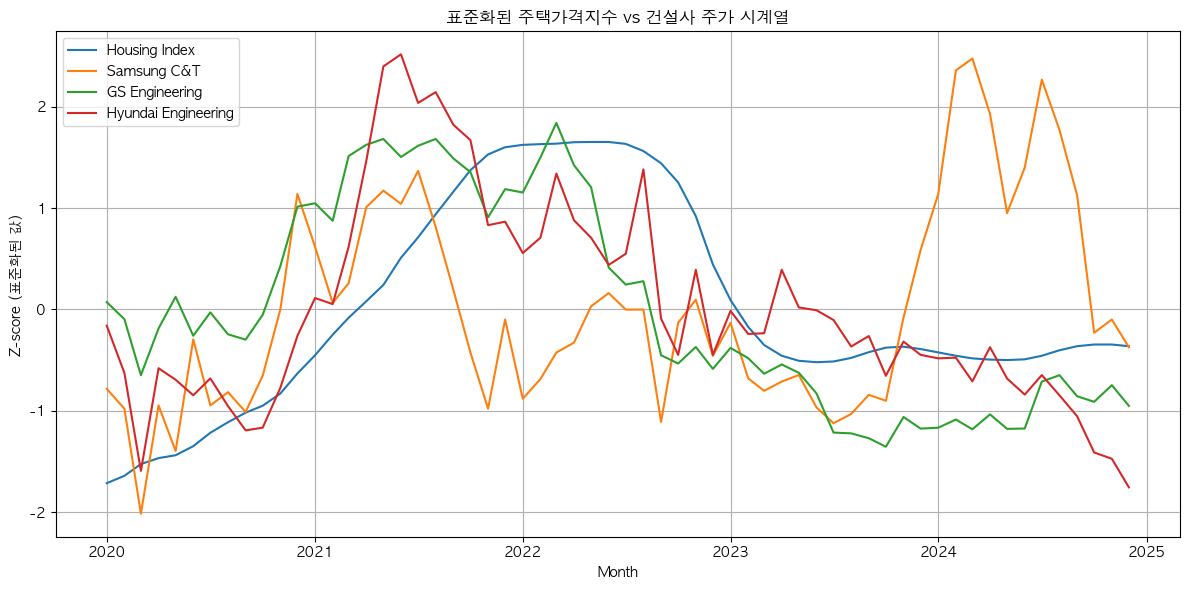

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_scaled.index, df_scaled['HousingIndex'], label='Housing Index')
plt.plot(df_scaled.index, df_scaled['Samsung'], label='Samsung C&T')
plt.plot(df_scaled.index, df_scaled['GS'], label='GS Engineering')
plt.plot(df_scaled.index, df_scaled['Hyundai'], label='Hyundai Engineering')

plt.title("표준화된 주택가격지수 vs 건설사 주가 시계열")
plt.xlabel("Month")
plt.ylabel("Z-score (표준화된 값)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Samsung vs HousingIndex:               HousingIndex   Samsung
HousingIndex      1.000000  0.068049
Samsung           0.068049  1.000000


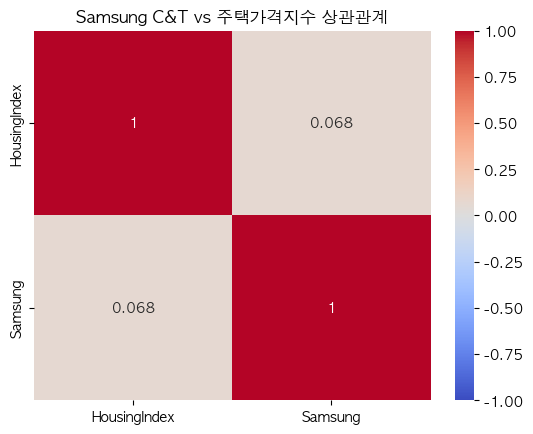

In [31]:
# 상관계수
print("Samsung vs HousingIndex:", df[['HousingIndex', 'Samsung']].corr())

# 히트맵
sns.heatmap(df[['HousingIndex', 'Samsung']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Samsung C&T vs 주택가격지수 상관관계")
plt.show()


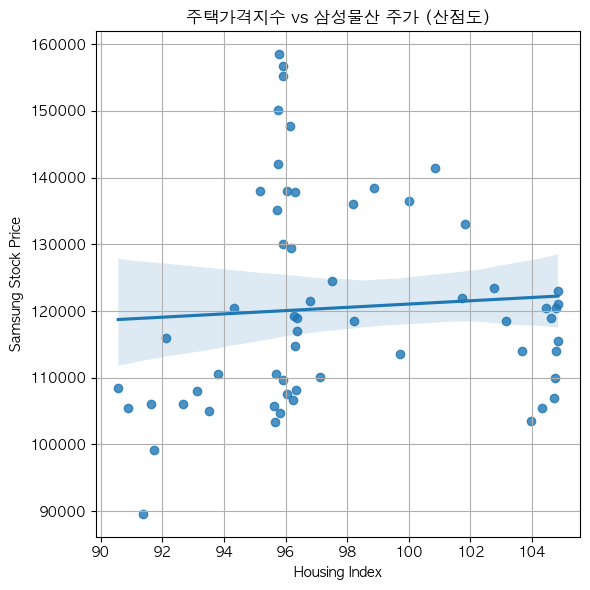

In [32]:
plt.figure(figsize=(6, 6))
sns.regplot(x='HousingIndex', y='Samsung', data=df)
plt.title("주택가격지수 vs 삼성물산 주가 (산점도)")
plt.xlabel("Housing Index")
plt.ylabel("Samsung Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

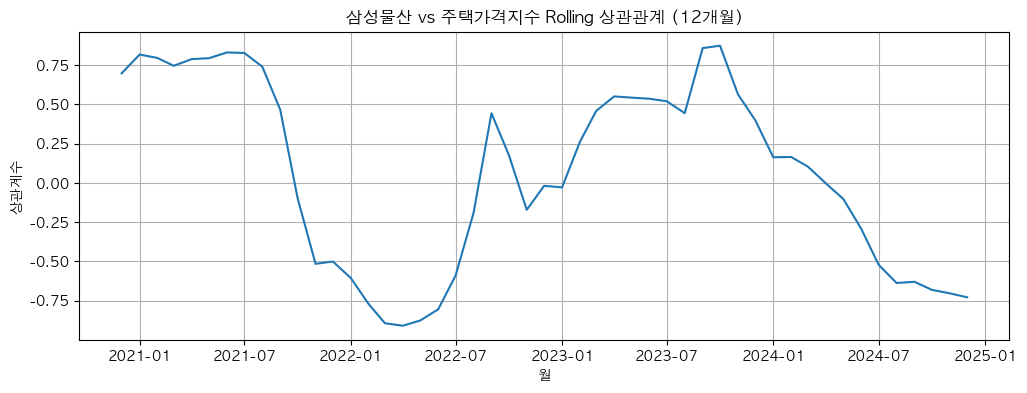

In [33]:
rolling_corr = df['HousingIndex'].rolling(12).corr(df['Samsung'])  # 12개월 이동상관
plt.figure(figsize=(12, 4))
plt.plot(df.index, rolling_corr)
plt.title("삼성물산 vs 주택가격지수 Rolling 상관관계 (12개월)")
plt.xlabel("월")
plt.ylabel("상관계수")
plt.grid(True)
plt.show()

Hyundai vs HousingIndex:               HousingIndex   Hyundai
HousingIndex      1.000000  0.656604
Hyundai           0.656604  1.000000


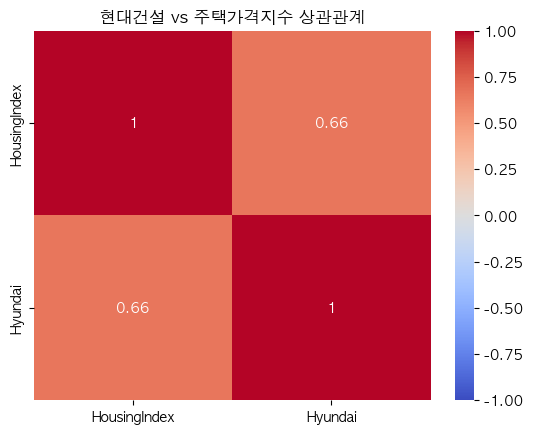

In [34]:
print("Hyundai vs HousingIndex:", df[['HousingIndex', 'Hyundai']].corr())

sns.heatmap(df[['HousingIndex', 'Hyundai']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("현대건설 vs 주택가격지수 상관관계")
plt.show()


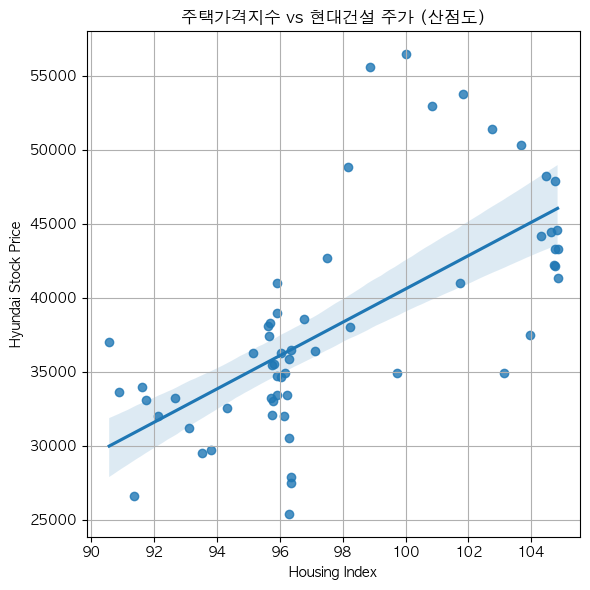

In [35]:
plt.figure(figsize=(6, 6))
sns.regplot(x='HousingIndex', y='Hyundai', data=df)
plt.title("주택가격지수 vs 현대건설 주가 (산점도)")
plt.xlabel("Housing Index")
plt.ylabel("Hyundai Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

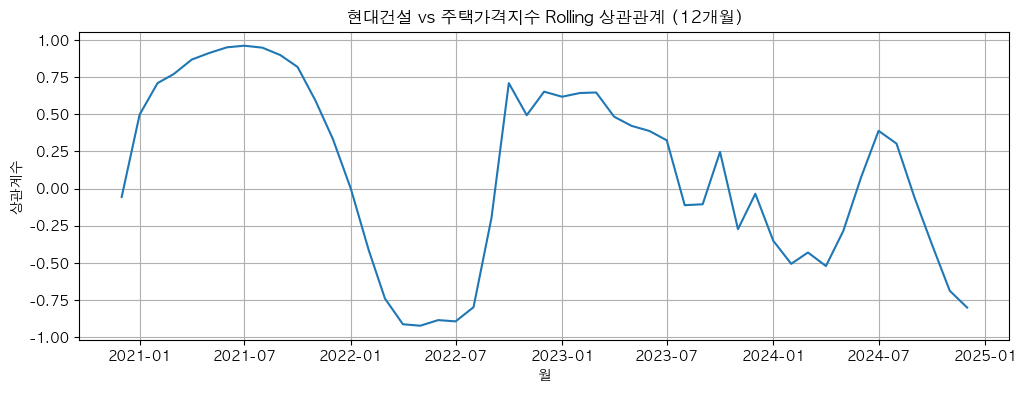

In [36]:
rolling_corr = df['HousingIndex'].rolling(12).corr(df['Hyundai'])  # 12개월 이동상관
plt.figure(figsize=(12, 4))
plt.plot(df.index, rolling_corr)
plt.title("현대건설 vs 주택가격지수 Rolling 상관관계 (12개월)")
plt.xlabel("월")
plt.ylabel("상관계수")
plt.grid(True)
plt.show()

GS vs HousingIndex:               HousingIndex        GS
HousingIndex      1.000000  0.531581
GS                0.531581  1.000000


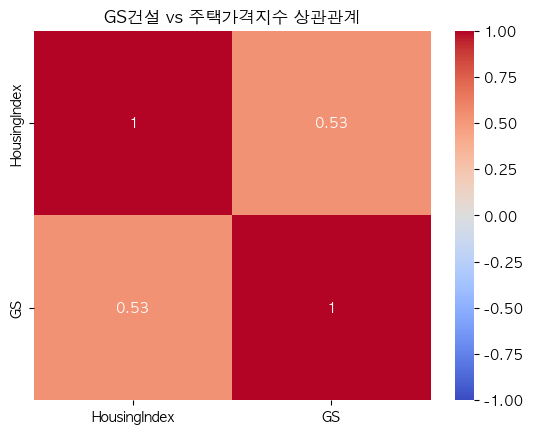

In [37]:
print("GS vs HousingIndex:", df[['HousingIndex', 'GS']].corr())

sns.heatmap(df[['HousingIndex', 'GS']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("GS건설 vs 주택가격지수 상관관계")
plt.show()


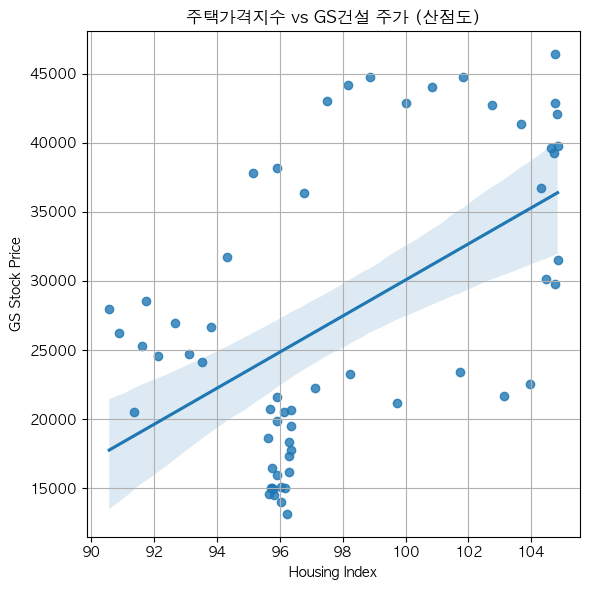

In [38]:
plt.figure(figsize=(6, 6))
sns.regplot(x='HousingIndex', y='GS', data=df)
plt.title("주택가격지수 vs GS건설 주가 (산점도)")
plt.xlabel("Housing Index")
plt.ylabel("GS Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()


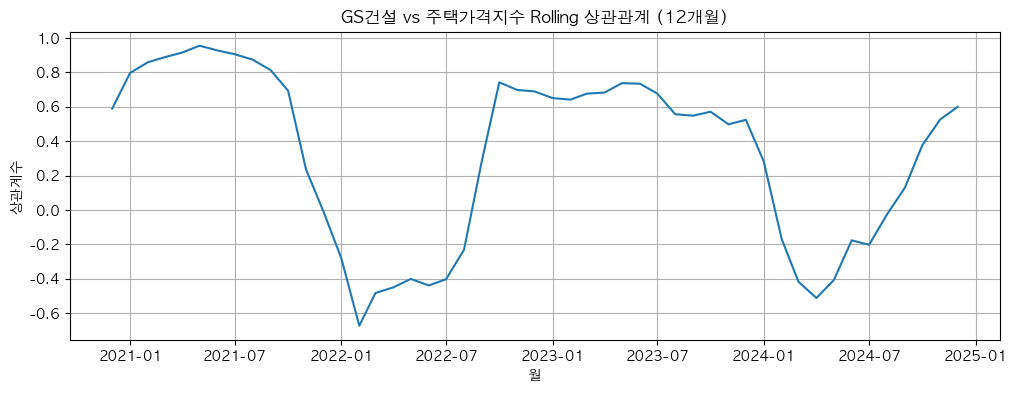

In [39]:
rolling_corr = df['HousingIndex'].rolling(12).corr(df['GS'])  # 12개월 이동상관
plt.figure(figsize=(12, 4))
plt.plot(df.index, rolling_corr)
plt.title("GS건설 vs 주택가격지수 Rolling 상관관계 (12개월)")
plt.xlabel("월")
plt.ylabel("상관계수")
plt.grid(True)
plt.show()


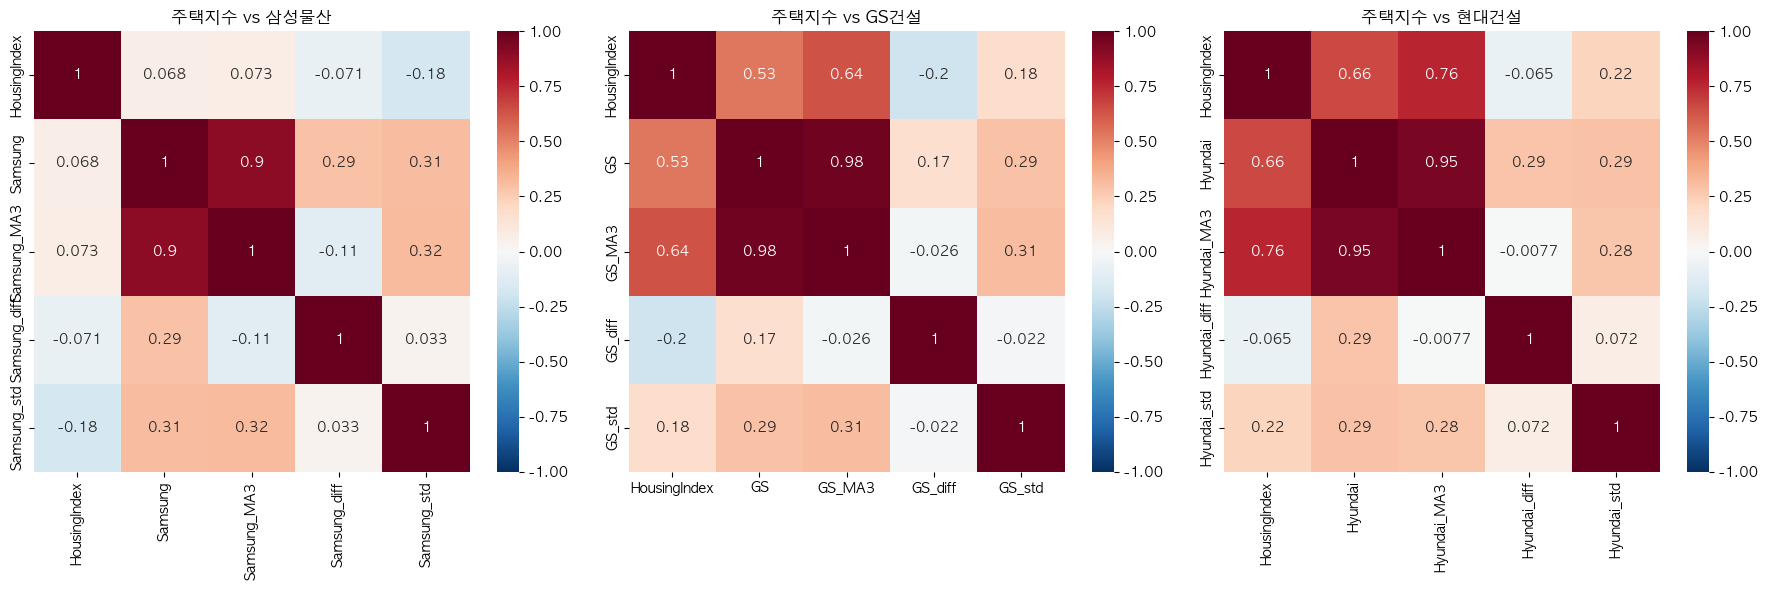

In [40]:
# 파생 변수 생성
df['Samsung_MA3'] = df['Samsung'].rolling(3).mean()
df['Samsung_diff'] = df['Samsung'].diff()
df['Samsung_std'] = df['Samsung'].rolling(3).std()

df['GS_MA3'] = df['GS'].rolling(3).mean()
df['GS_diff'] = df['GS'].diff()
df['GS_std'] = df['GS'].rolling(3).std()

df['Hyundai_MA3'] = df['Hyundai'].rolling(3).mean()
df['Hyundai_diff'] = df['Hyundai'].diff()
df['Hyundai_std'] = df['Hyundai'].rolling(3).std()

# 상관관계 행렬 계산
samsung_corr = df[['HousingIndex', 'Samsung', 'Samsung_MA3', 'Samsung_diff', 'Samsung_std']].corr()
gs_corr = df[['HousingIndex', 'GS', 'GS_MA3', 'GS_diff', 'GS_std']].corr()
hyundai_corr = df[['HousingIndex', 'Hyundai', 'Hyundai_MA3', 'Hyundai_diff', 'Hyundai_std']].corr()

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(samsung_corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("주택지수 vs 삼성물산")

sns.heatmap(gs_corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("주택지수 vs GS건설")

sns.heatmap(hyundai_corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, ax=axes[2])
axes[2].set_title("주택지수 vs 현대건설")

plt.tight_layout()
plt.show()


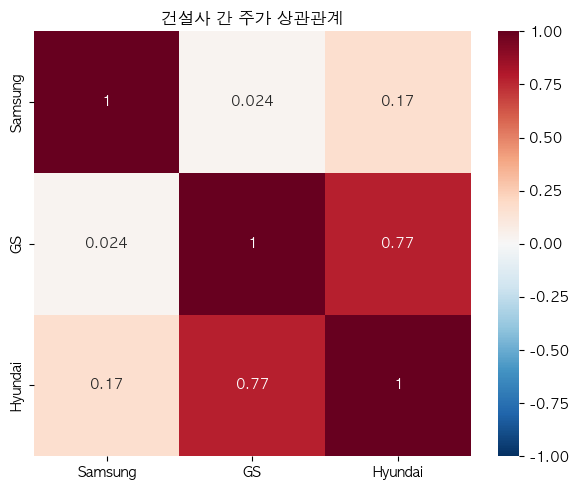

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# 기업 간 주가 상관관계 계산
price_corr = df[['Samsung', 'GS', 'Hyundai']].corr()

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(price_corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title("건설사 간 주가 상관관계")
plt.tight_layout()
plt.show()


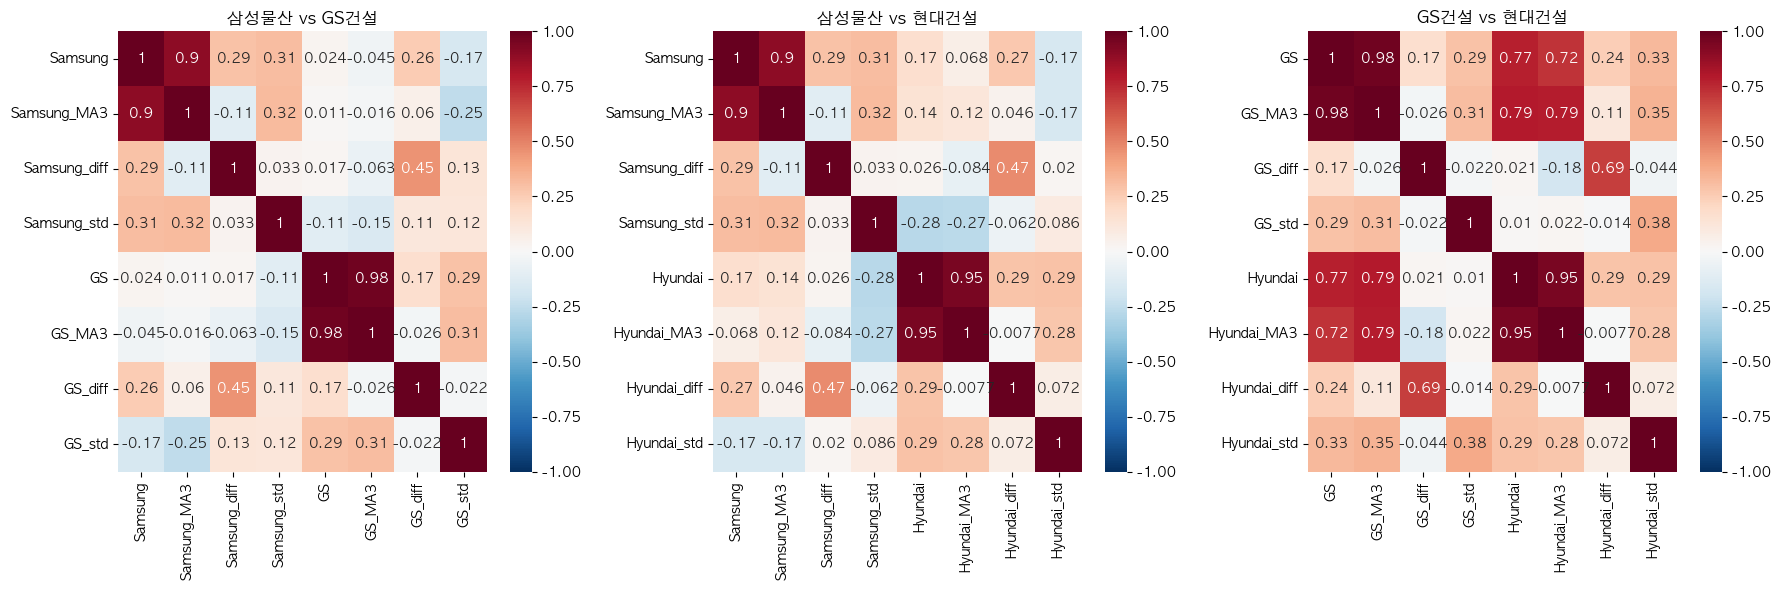

In [42]:
# 두 기업씩 3쌍으로 확장형 상관관계 히트맵
import seaborn as sns
import matplotlib.pyplot as plt

# 변수 쌍 정의
pair1 = ['Samsung', 'Samsung_MA3', 'Samsung_diff', 'Samsung_std',
         'GS', 'GS_MA3', 'GS_diff', 'GS_std']
pair2 = ['Samsung', 'Samsung_MA3', 'Samsung_diff', 'Samsung_std',
         'Hyundai', 'Hyundai_MA3', 'Hyundai_diff', 'Hyundai_std']
pair3 = ['GS', 'GS_MA3', 'GS_diff', 'GS_std',
         'Hyundai', 'Hyundai_MA3', 'Hyundai_diff', 'Hyundai_std']

# 상관관계 계산
corr1 = df[pair1].corr()
corr2 = df[pair2].corr()
corr3 = df[pair3].corr()

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(corr1, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("삼성물산 vs GS건설")

sns.heatmap(corr2, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("삼성물산 vs 현대건설")

sns.heatmap(corr3, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, ax=axes[2])
axes[2].set_title("GS건설 vs 현대건설")

plt.tight_layout()
plt.show()


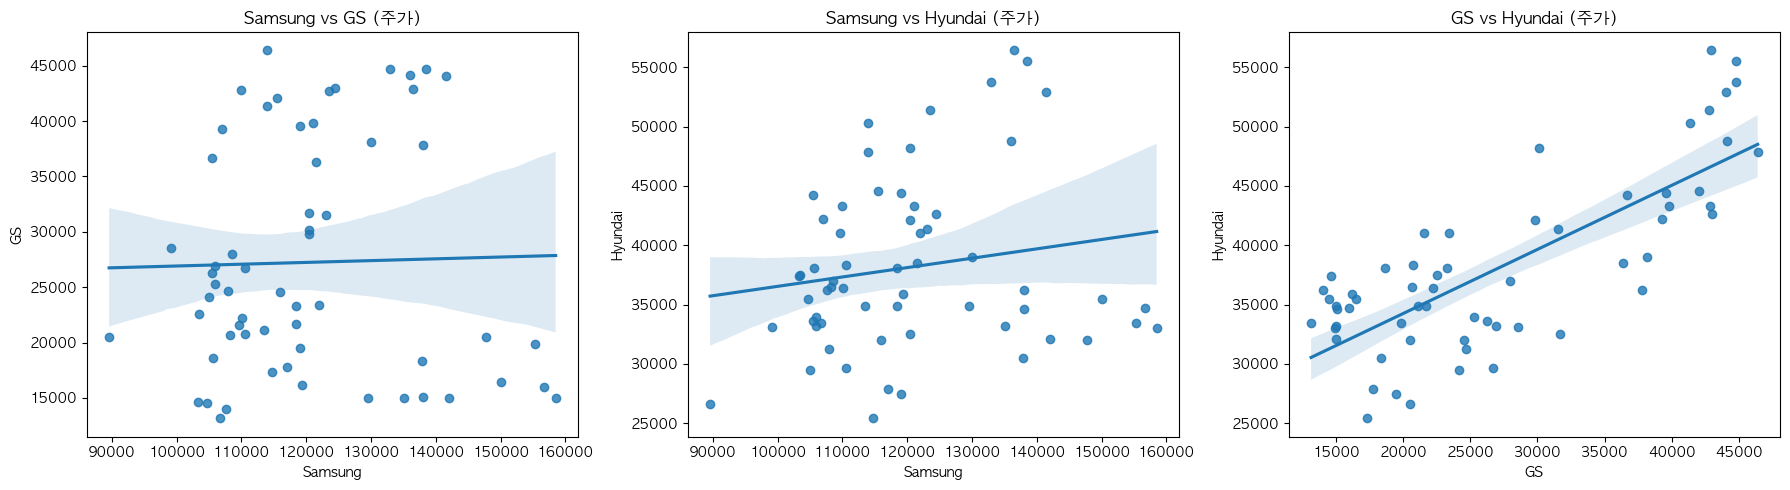

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Samsung vs GS
sns.regplot(x='Samsung', y='GS', data=df, ax=axes[0])
axes[0].set_title("Samsung vs GS (주가)")

# Samsung vs Hyundai
sns.regplot(x='Samsung', y='Hyundai', data=df, ax=axes[1])
axes[1].set_title("Samsung vs Hyundai (주가)")

# GS vs Hyundai
sns.regplot(x='GS', y='Hyundai', data=df, ax=axes[2])
axes[2].set_title("GS vs Hyundai (주가)")

plt.tight_layout()
plt.show()


In [44]:
from statsmodels.tsa.stattools import ccf
import numpy as np
import matplotlib.pyplot as plt

def plot_cross_corr(x, y, name1, name2, lags=12):
    # 평균 제거 (정상화)
    x = (x - x.mean()) / x.std()
    y = (y - y.mean()) / y.std()
    
    # 교차상관 계산
    corr = [x.corr(y.shift(lag)) for lag in range(-lags, lags+1)]
    lag_range = np.arange(-lags, lags+1)

    # 시각화
    plt.figure(figsize=(8, 4))
    plt.bar(lag_range, corr, color='skyblue')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'{name1} vs {name2} 교차상관 (±{lags}개월)')
    plt.xlabel("Lag (월)")
    plt.ylabel("상관계수")
    plt.xticks(lag_range)
    plt.tight_layout()
    plt.show()


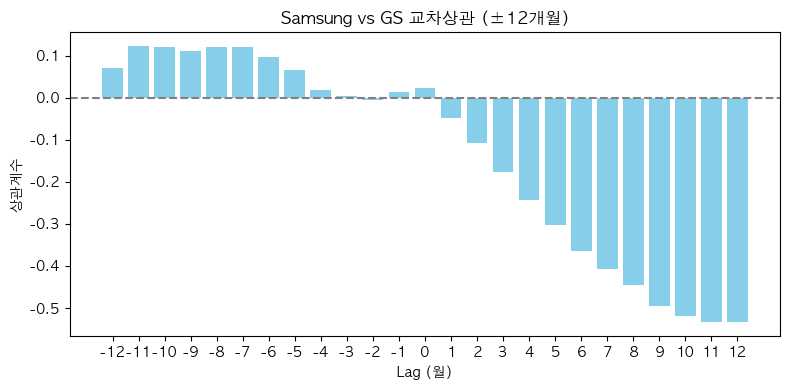

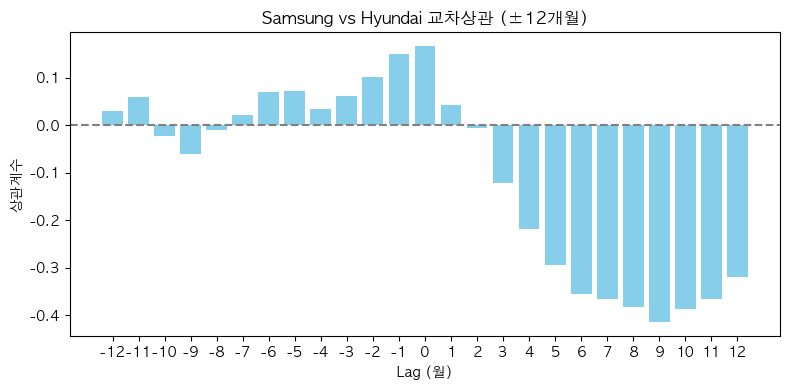

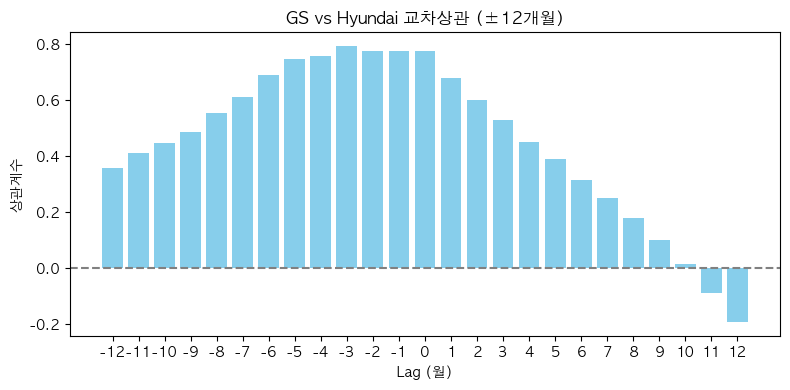

In [45]:
plot_cross_corr(df['Samsung'], df['GS'], "Samsung", "GS")
plot_cross_corr(df['Samsung'], df['Hyundai'], "Samsung", "Hyundai")
plot_cross_corr(df['GS'], df['Hyundai'], "GS", "Hyundai")

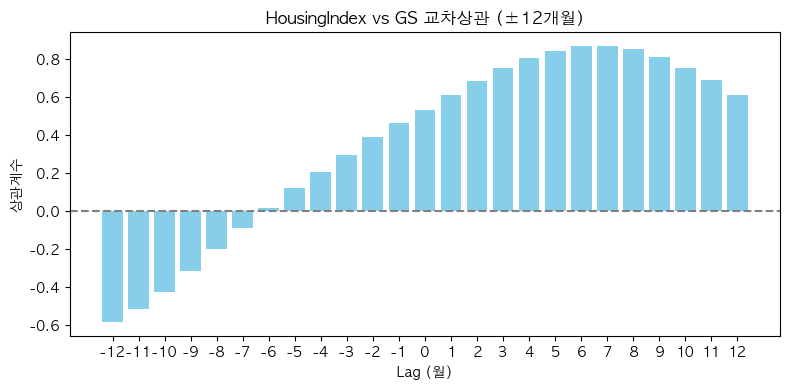

In [46]:
plot_cross_corr(df['HousingIndex'], df['GS'], "HousingIndex", "GS")


/opt/miniconda3/envs/pknu/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/pknu/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/pknu/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/pknu/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/envs/pknu/lib/python3.12/site-packages/statsmodels/tsa/statespace/s

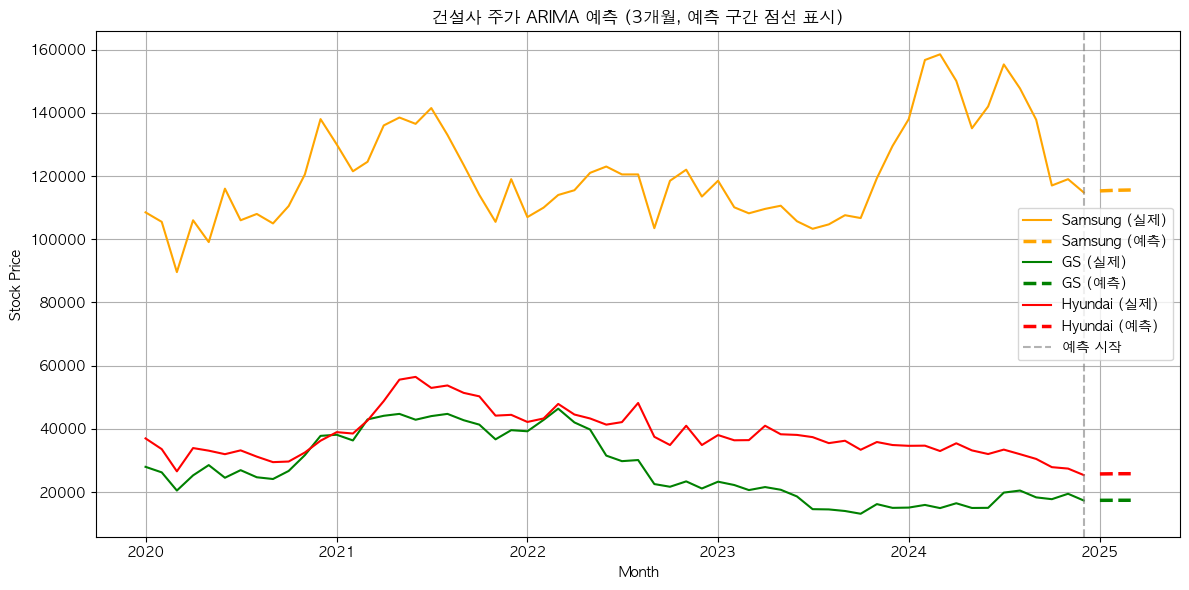

In [47]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# 예측 개월 수
forecast_period = 3
history_end = df.index[-1]

# 예측 저장 DataFrame
forecast_df = pd.DataFrame(index=pd.date_range(history_end + pd.DateOffset(months=1),
                                               periods=forecast_period, freq='MS'))

# 각 기업별 ARIMA 모델 적용 및 예측
for col in ['Samsung', 'GS', 'Hyundai']:
    model = ARIMA(df[col], order=(1, 1, 1))
    fit = model.fit()
    forecast_df[col] = fit.forecast(steps=forecast_period).values

# 시계열 합치기
full_df = pd.concat([df[['Samsung', 'GS', 'Hyundai']], forecast_df])
full_df.index.name = 'month'

# 시각화
plt.figure(figsize=(12, 6))
colors = {'Samsung': 'orange', 'GS': 'green', 'Hyundai': 'red'}

for col in ['Samsung', 'GS', 'Hyundai']:
    plt.plot(df.index, df[col], label=f"{col} (실제)", color=colors[col])
    plt.plot(forecast_df.index, forecast_df[col], linestyle='--', linewidth=2.5, label=f"{col} (예측)", color=colors[col])

plt.axvline(history_end, color='gray', linestyle='--', alpha=0.6, label='예측 시작')
plt.title("건설사 주가 ARIMA 예측 (3개월, 예측 구간 점선 표시)")
plt.xlabel("Month")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

